# This is a Jupyter Notebook

A jupyter notebook lets you combine text, code and visualizations all in one document. This block is called a cell. 

You can format the text exactly like you would with a word document when you work with markdown cells.
- lists
- **bold text**
- *italic text*
- code blocks
- images
- hyperlinks

## You can create headers


### And subheaders

# A Markdown Cell with an Image and a HyperLink

Python's creator has a sense of humor. Python isn't named for the snake - it's actually named after the BBC comedy show Monty Python's Flying Circus so there are funny jokes sprinkled throughout.  Here's a link to learn a bit more about him - [Guido van Rossum](https://gvanrossum.github.io/)

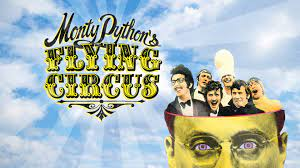




# Python's Inventor Wanted Coding to Be Simple

The syntax uses English key words and was meant to be easily read and easy to use. 

In [5]:
# Your first line of Python code

print('Hello, World!')

Hello, World!


In [7]:
name = input('Hey there, what'"'"'s your name?')
print(f'Hi, {name}')

Hey there, what's your name?Nicole
Hi, Nicole


In [8]:
import this

In [9]:
import antigravity

Opens [the xkcd webcomic](https://xkcd.com/353/) in a new window.  It's a funny site.... don't fall down the rabbit hole over there.

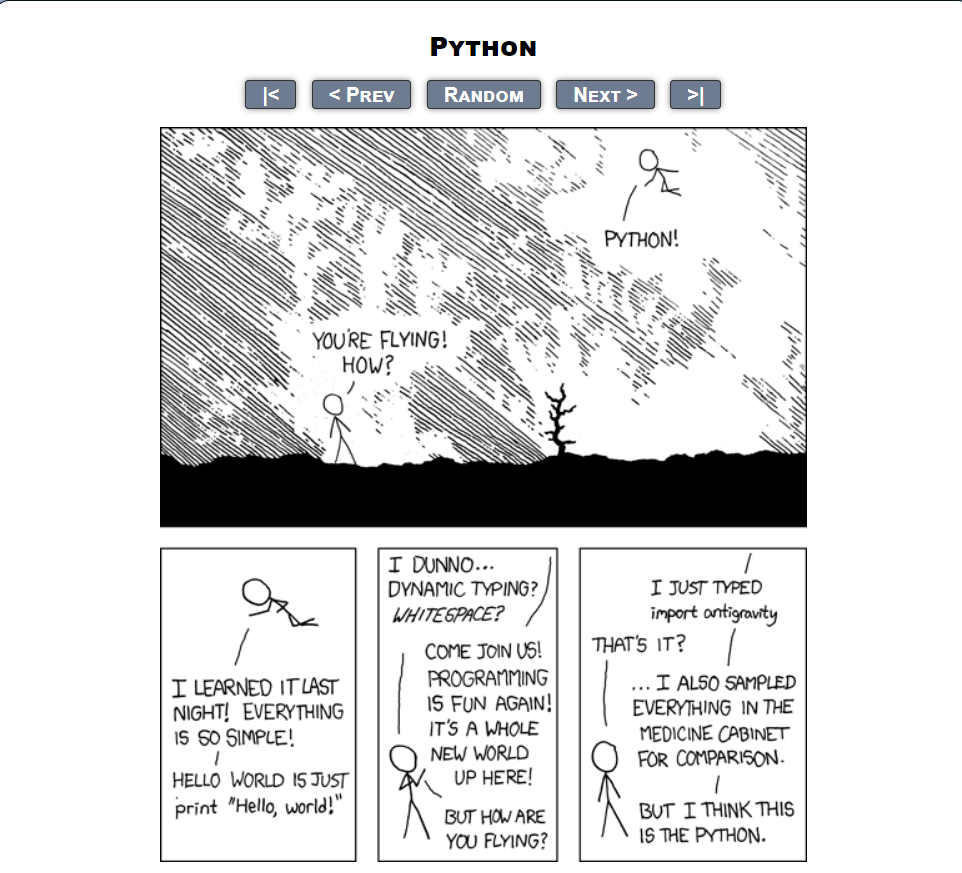

## Python Libraries for Data Analysis

### Data Management
- [pandas](https://pandas.pydata.org/)
- [numpy](https://numpy.org/)

### Stats
- [statsmodels](https://www.statsmodels.org/stable/index.html)

### Data Visualization
- [matplotlib](https://matplotlib.org/stable/)
- [seaborn](https://seaborn.pydata.org/)

## Pandas Data Structures vs Excel Tables

As you can see below, a Pandas DataFrame looks very similar to an Excel table or worksheet. Like Excel tables, pandas DataFrames are made up of columns, rows and indices. However, in Pandas, a column is called a series and row indices begin with 0 instead of 1.


#### Excel

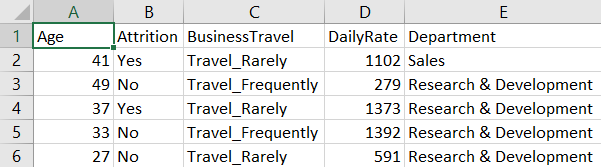


#### DataFrame

|    |   Age | Attrition   | BusinessTravel    |   DailyRate | Department             |
|---:|------:|:------------|:------------------|------------:|:-----------------------|
|  0 |    41 | Yes         | Travel_Rarely     |        1102 | Sales                  |
|  1 |    49 | No          | Travel_Frequently |         279 | Research & Development |
|  2 |    37 | Yes         | Travel_Rarely     |        1373 | Research & Development |
|  3 |    33 | No          | Travel_Frequently |        1392 | Research & Development |
|  4 |    27 | No          | Travel_Rarely     |         591 | Research & Development |







## Understand the Business Problem

An executive approaches you and tells you that attrition seems high and they're not sure why. They ask you to investigatate using a dataset of active employees and terminated employees from a given period.

## Import Pandas and Other Key Libraries

Importing these libaries gives you access to all the functions you need to complete your analysis

In [10]:
import pandas as pd # import loads the pandas library and the naming convetion is to call pandas as pd
import numpy as np # loads numpy library for math functions
import statsmodels.api as sm # stats library

# import data visualization models
import matplotlib.pyplot as plt # visualization library
from matplotlib import ticker as mtick
from matplotlib.gridspec import GridSpec
import seaborn as sns

## Read in Data from a File

We're going to read in data from a csv file and save it as a pandas DataFrame. We'll do some light data cleaning at this stage.

In [57]:
# reads the file into a dataframe
employees = pd.read_csv(r'C:\Users\nmatt\python_scripts\python_for_excel_users\data\input'
                        '\WA_Fn-UseC_-HR-Employee-Attrition.csv') #the string is the file location and name


# list of new column labels
new_cols = ['age', 'attrition', 'frequent_traveler', 'daily_rate', 
            'department', 'commute_distance', 'education', 
            'education_field', 'employee_count','employee_number',
            'environment_satisfaction', 'gender', 'hourly_rate',
            'job_involvement', 'job_level', 'job_role', 
            'job_satisfaction', 'marital_status', 'monthly_income', 
            'monthly_rate', 'num_companies_worked','over_18', 
            'over_time', 'percent_salary_hike', 'performance_rating',
            'relationship_satisfaction', 'standard_hours', 
            'stock_option_level','total_working_years', 
            'training_times_last_year', 'work_life_balance',
            'tenure', 'time_in_role', 'years_since_last_promotion',
            'years_with_current_manager']

# update column labels 
employees.columns = new_cols

# abbreviate dept. names and save as new column
employees['dept_name_abbr'] = employees.department.replace({'Human Resources':'HR', 'Research & Development':'R&D'})

#indicates 1 year of tenure or less
employees['one_or_less'] = employees.tenure <= 1


# creates a dataframe of sales employees
sales = employees.loc[employees.department == 'Sales'].copy()

## View Our Data

We'll take a look at our data to make sure that everything looks ok

In [58]:
employees

,age,attrition,frequent_traveler,daily_rate,department,commute_distance,education,education_field,employee_count,employee_number,...,stock_option_level,total_working_years,training_times_last_year,work_life_balance,tenure,time_in_role,years_since_last_promotion,years_with_current_manager,dept_name_abbr,one_or_less
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,8,0,1,6,4,0,5,Sales,False
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,1,10,3,3,10,7,1,7,R&D,False
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,7,3,3,0,0,0,0,R&D,True
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,0,8,3,3,8,7,3,0,R&D,False
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,1,6,3,3,2,2,2,2,R&D,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,1,17,3,3,5,2,0,3,R&D,False
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,9,5,3,7,7,1,7,R&D,False
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,1,6,0,3,6,2,0,3,R&D,False
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,0,17,3,2,9,6,0,8,Sales,False


## Manipulate the Data

We can manipulate our data to answer specific questions. The executive mentioned that attrition is high.  We can use a pandas pivot table to calculate this exactly like we would in Excel.


| dept_name_abbr   |   No  |   Yes  |
|:-----------------|------:|-------:|
| HR               |   81% |    19% |
| Sales            |   79% |    21% |
| R&D              |   86% |    14% |
| All              |   84% |    16% |


### Attrition by Department

Overall the organization has a 16% attrition rate. Here we see that the largest department, research & development, has the lowest attrition rate. Attrition is higher in Sales and HR. 
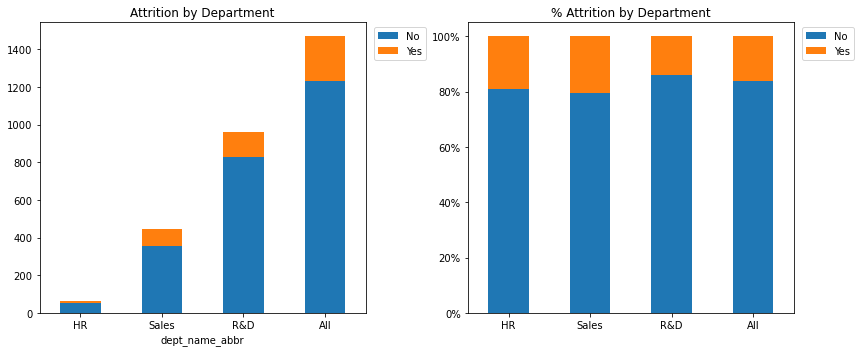


### Attrition in Sales

If we expect a 16% attrition rate for each department in the organization, we can see that there were 20 more exits than expected in the Sales department but only 2 more than expected in HR. 


| department   |   Expected |   Actual |  
|:-------------|-----------:|---------:|
| HR           |         10 |       12 |
| Sales        |         72 |       92 |
| R&D          |        155 |      133 |

If we drill down into the Sales department we can take a look at attrition by job role. Most of what we're seeing is high attrition among Sales Representatives. Attrition for that group is 40% and just over half of those exiting were with the organization one year or less.

| job_role             |   No |   Yes |
|:---------------------|-----:|------:|
| Manager              | 95%  |  5%   |
| Sales Executive      | 83%  |  17%  |
| Sales Representative | 60%  |  40%  |

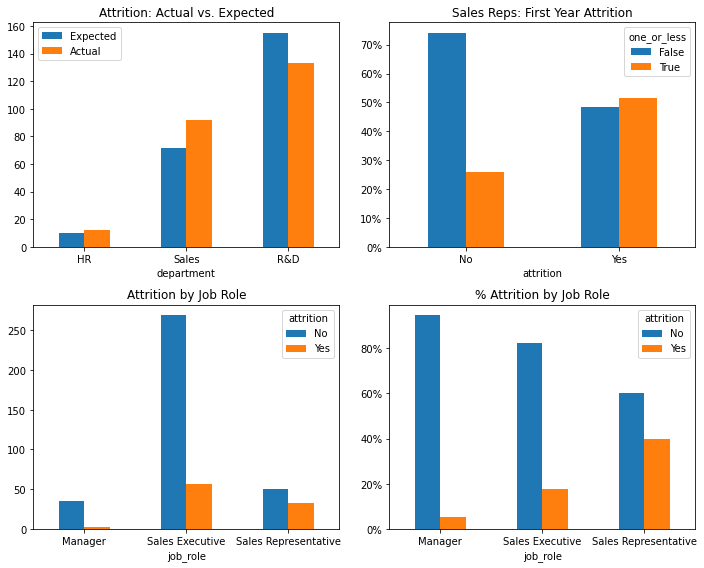

### Possible Attrition Drivers

Let's take a double click into possible causes of attrition among Sales Representatives. We're only going to focus on a few variables here.  Median monthly income is lower for employees who exited than those who stayed. We can also see higher attrition among employees who are doing OT and those who are traveling frequently. We can quickly find and visualize actionable insights with pandas.


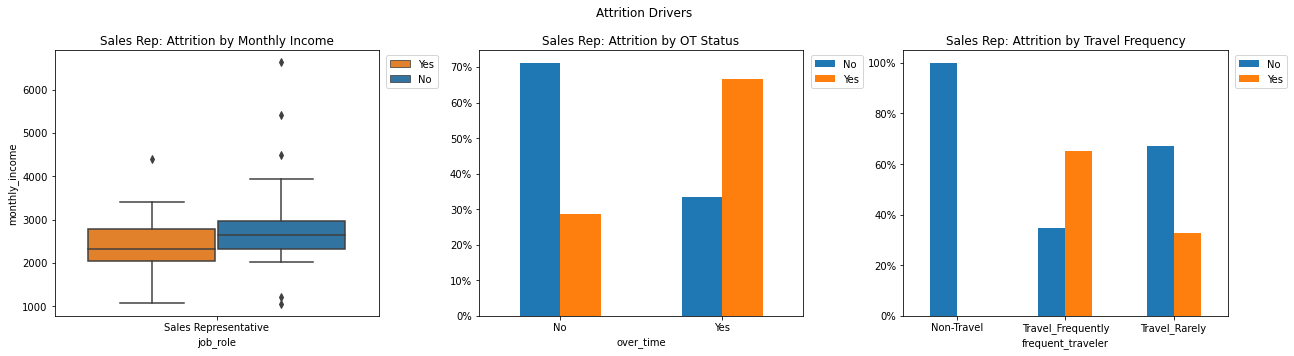

## Interpret the Results
High attrition in the Sales department is being pushed upwards by exits among Sales Representatives. Working overtime and traveling frequently appear to be contributing factors.

## Communicate the results


### Attrition Scorecard

The visualizations created above were using the basic pandas functionality. Matplotlib and seaborn are a couple of visualization libraries that you can use to full customize your charts. 
 - Customize colors
 - Remove distracting features
 - Label directly on the chart


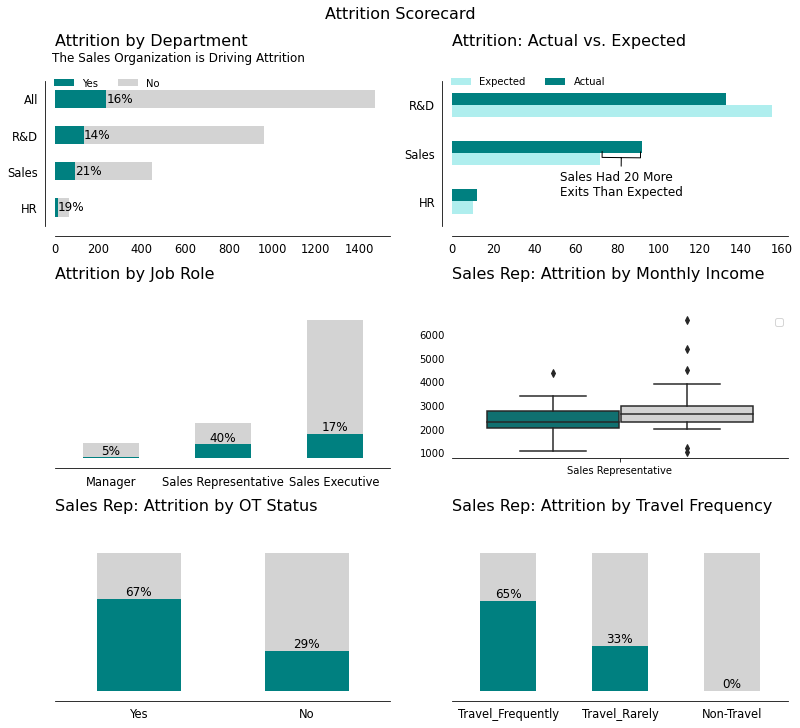

In [33]:
# creates count of attrition by dept
attr_by_dept = (pd.crosstab(employees.dept_name_abbr, employees.attrition, margins=True).sort_values(by='No'))

attr_by_dept

attrition,No,Yes,All
dept_name_abbr,,,
HR,51,12,63
Sales,354,92,446
R&D,828,133,961
All,1233,237,1470


In [34]:
attr_by_dept_pct = (pd.crosstab(employees.dept_name_abbr, employees.attrition, margins=True, normalize = 'index')
                    .reindex(attr_by_dept.index))
attr_by_dept_pct

attrition,No,Yes
dept_name_abbr,,
HR,0.809524,0.190476
Sales,0.793722,0.206278
R&D,0.861602,0.138398
All,0.838776,0.161224


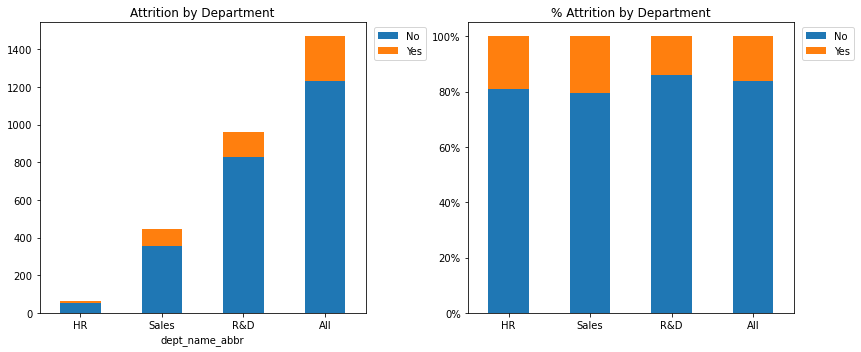

In [35]:
fig, axes = plt.subplots(1, 2, figsize = (12,5))
# plots attrition by dept
attr_by_dept.iloc[:,:-1].plot.bar(title = 'Attrition by Department', stacked = True, rot = 0, ax = axes[0])
axes[0].legend(loc = 'upper right', bbox_to_anchor = (1.2,1))


attr_by_dept_pct.plot.bar(title = '% Attrition by Department', stacked = True, rot = 0, ax = axes[1])
axes[1].yaxis.set_major_formatter(mtick.PercentFormatter(1,0))
axes[1].legend(loc = 'upper right', bbox_to_anchor = (1.2,1))
axes[1].set_xlabel('')

plt.tight_layout()

In [55]:
tab = sm.stats.Table(pd.crosstab(employees.department, employees.attrition))
obs_vs_exp = pd.concat([tab.fittedvalues.Yes, tab.table_orig.Yes], axis = 1)
obs_vs_exp.columns = ['Expected', 'Actual']
obs_vs_exp.rename(index = {'Human Resources':'HR', 'Research & Development': 'R&D'}, inplace = True)
obs_vs_exp = obs_vs_exp.sort_values(by = 'Actual')
obs_vs_exp

,Expected,Actual
department,,
HR,10.157143,12
Sales,71.906122,92
R&D,154.936735,133


In [37]:
attr_by_job_role_sales = pd.crosstab(sales.job_role, sales.attrition)

attr_by_job_role_sales

attrition,No,Yes
job_role,,
Manager,35,2
Sales Executive,269,57
Sales Representative,50,33


In [38]:
attr_by_job_role_pct_sales = pd.crosstab(sales.job_role, sales.attrition, normalize='index')

attr_by_job_role_pct_sales

attrition,No,Yes
job_role,,
Manager,0.945946,0.054054
Sales Executive,0.825153,0.174847
Sales Representative,0.602410,0.397590


In [89]:
one_or_less_by_role = pd.crosstab(index = [sales.job_role, sales.attrition], columns = sales.one_or_less,
            normalize='index')

one_or_less_by_role

one_or_less                        False      True
job_role             attrition                    
Manager              No         0.828571  0.171429
                     Yes        1.000000  0.000000
Sales Executive      No         0.933086  0.066914
                     Yes        0.877193  0.122807
Sales Representative No         0.740000  0.260000
                     Yes        0.484848  0.515152

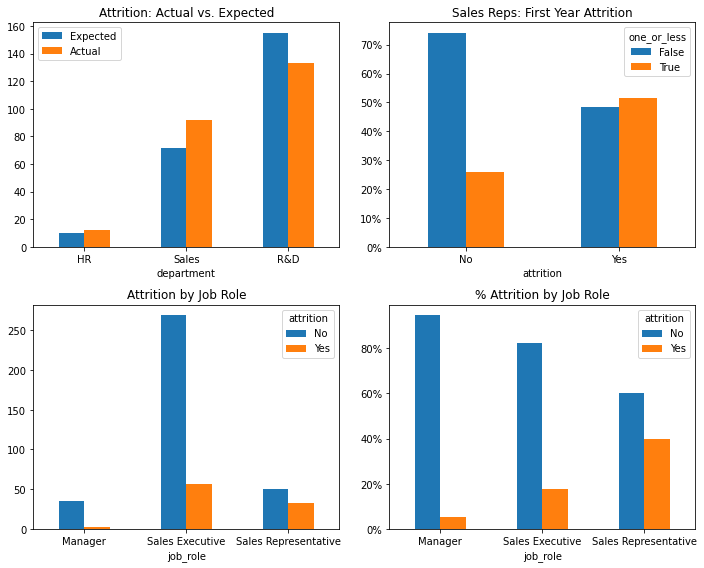

In [90]:
fig, axes = plt.subplots(2, 2, figsize = (10,8))
obs_vs_exp.plot.bar(title = 'Attrition: Actual vs. Expected', rot = 0, ax = axes[0][0])

one_or_less_by_role.loc['Sales Representative'].plot.bar(title = 'Sales Reps: First Year Attrition',
                                                         rot = 0, ax = axes[0][1])
axes[0][1].yaxis.set_major_formatter(mtick.PercentFormatter(1,0))


attr_by_job_role_sales.plot.bar(title = 'Attrition by Job Role', rot = 0, ax = axes[1][0])

attr_by_job_role_pct_sales.plot.bar(title = '% Attrition by Job Role', rot = 0, ax = axes[1][1])
axes[1][1].yaxis.set_major_formatter(mtick.PercentFormatter(1,0))

plt.tight_layout()

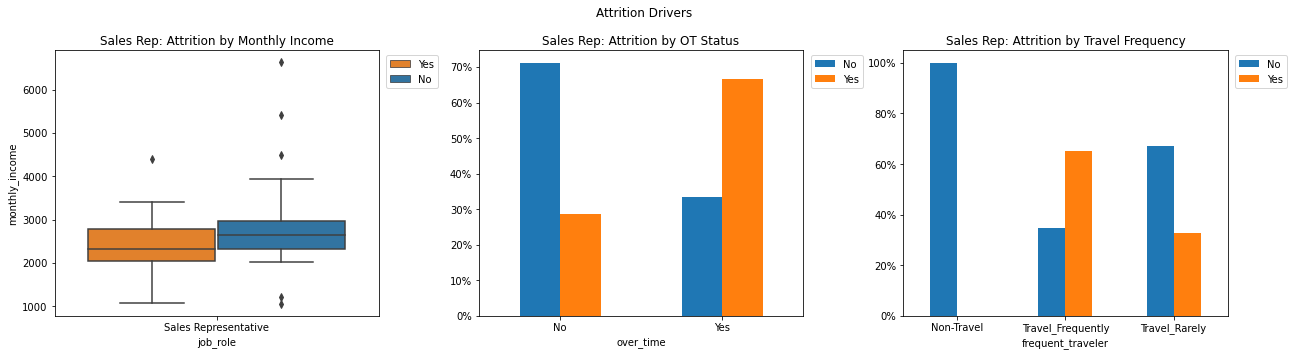

In [40]:
fig, axes = plt.subplots(1, 3, figsize = (18,5))

sns.boxplot(y = 'monthly_income', x = 'job_role', hue='attrition', palette = {'Yes':'tab:orange','No':'tab:blue'}, 
                 data = sales.loc[sales.job_role == 'Sales Representative'], ax = axes[0])

axes[0].legend(bbox_to_anchor= (1.2, 1))
axes[0].set_title('Sales Rep: Attrition by Monthly Income')


sales_rep_by_ot = pd.crosstab(index = [sales.job_role, sales.over_time], columns= sales.attrition,
            values = sales.employee_number, aggfunc = 'count', normalize = 'index').loc['Sales Representative']
sales_rep_by_ot.plot.bar(title = 'Sales Rep: Attrition by OT Status', rot = 0, ax = axes[1])
axes[1].legend(bbox_to_anchor= (1.2, 1))
axes[1].yaxis.set_major_formatter(mtick.PercentFormatter(1,0))

sales_rep_by_travel = pd.crosstab(index = [sales.job_role, sales.frequent_traveler], columns= sales.attrition,
            values = sales.employee_number, aggfunc = 'count', normalize = 'index').loc['Sales Representative']
sales_rep_by_travel.plot.bar(title = 'Sales Rep: Attrition by Travel Frequency', rot = 0, ax = axes[2])
axes[2].legend(bbox_to_anchor= (1.2, 1))
axes[2].yaxis.set_major_formatter(mtick.PercentFormatter(1,0))

fig.suptitle('Attrition Drivers')

plt.tight_layout()

<AxesSubplot:xlabel='work_life_balance'>

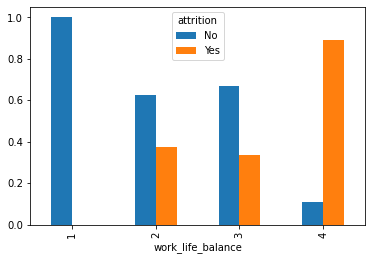

In [41]:
pd.crosstab(index = [sales.job_role, sales.work_life_balance], columns= sales.attrition,
            values = sales.employee_number, aggfunc = 'count', normalize = 'index').loc['Sales Representative'].plot.bar()

Text(0.5, 0.98, 'Attrition Scorecard')

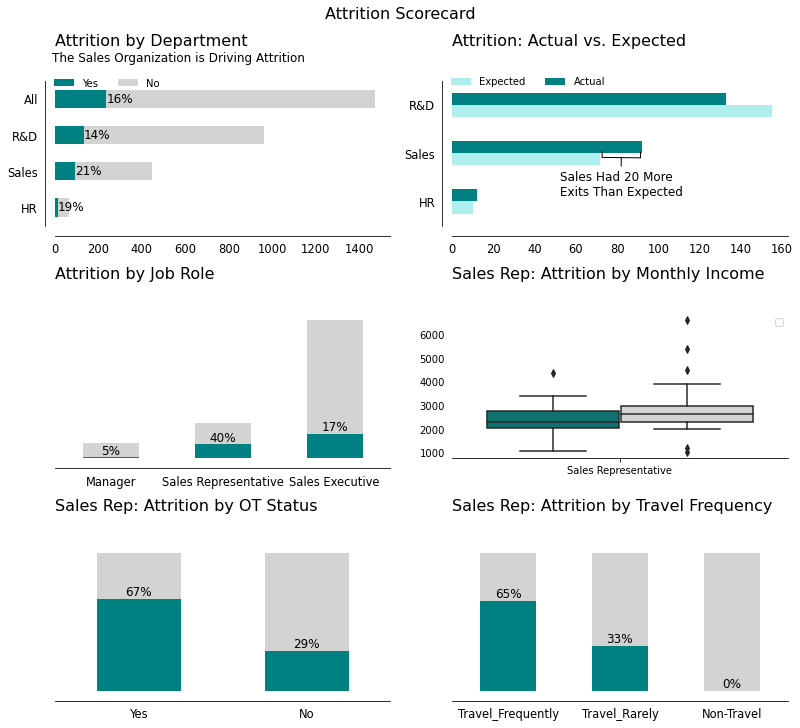

In [42]:
fig = plt.figure(figsize=(11,10),constrained_layout=True)
gs = GridSpec(3, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])


attr_by_dept.iloc[:,:-1].sort_index(ascending = False,  
                                    axis = 1).plot.barh(stacked = True, color = {'Yes':'teal','No':'lightgray'}, ax = ax1)

ax1.set_title('Attrition by Department', loc = 'left', pad = 35, size = 16)

ax1.set_ylabel('')
ax1.legend(ncol = 2, frameon = False, loc = 'upper left', bbox_to_anchor = (-0.03,1.08))


for spine in ['top', 'right']:
    ax1.spines[spine].set_visible(False)
    
    
for spine in ['bottom', 'left']:
    ax1.spines[spine].set_position(('outward', 10))    
    
ax1.tick_params(bottom = False, left = False, labelsize = 11.5)    

for p in ax1.containers[-1].patches:
    x, y = p.get_xy()
    width = p.get_width()
    height = p.get_height()
    attr_rate = x/(x+width)
    
    ax1.annotate(f'{attr_rate:0.0%}', xy = (x,y+height/2), va = 'center', size = 12)
    
    
fig.text(x = 0.06, y = 0.92, s='The Sales Organization is Driving Attrition ', size = 12)    



ax2 = fig.add_subplot(gs[0, 1])

obs_vs_exp.plot.barh(color = {'Actual':'teal','Expected':'paleturquoise'}, ax = ax2)
ax2.set_title('Attrition: Actual vs. Expected', loc = 'left', pad = 35, size = 16)

ax2.set_ylabel('')
ax2.legend(ncol = 2, frameon = False, loc = 'upper left', bbox_to_anchor = (-0.03,1.09))


for spine in ['top', 'right']:
    ax2.spines[spine].set_visible(False)
    
    
for spine in ['bottom', 'left']:
    ax2.spines[spine].set_position(('outward', 10))    
    
ax2.tick_params(bottom = False, left = False, labelsize = 11.5)    

# adds annotation to right bar    
ax2.annotate('Sales Had 20 More \nExits Than Expected', 
            xy = (82, 0.95), xytext = (.32,.21), textcoords = 'axes fraction', size = 12,
            arrowprops = dict(arrowstyle='-[, widthB=1.6, lengthB=0.5', lw=1))    


ax3 = fig.add_subplot(gs[1, 0])

attr_by_job_role_sales.sort_values(by = 'No').sort_index(ascending = False, axis = 1).plot.bar(stacked = True, 
                                                       color = {'Yes':'teal','No':'lightgray'}, rot = 0,
                                                                                               legend = None, ax = ax3)


for spine in ['top', 'right', 'left']:
    ax3.spines[spine].set_visible(False)
    
    
ax3.spines['bottom'].set_position(('outward', 10))    
    
ax3.tick_params(bottom = False, left = False, labelsize = 11.5)    

for p in ax3.containers[-1].patches:
    x, y = p.get_xy()
    width = p.get_width()
    height = p.get_height()
    attr_rate = y/(y+height)
    
    ax3.annotate(f'{attr_rate:0.0%}', xy = (x + width/2,y), va = 'bottom', ha = 'center', size = 12)
    
ax3.set_title('Attrition by Job Role', loc = 'left', pad = 35, size = 16)    
ax3.yaxis.set_visible(False)
ax3.set_xlabel('')
    

ax4 = fig.add_subplot(gs[1, 1])

sns.boxplot(y = 'monthly_income', x = 'job_role', hue='attrition', palette = {'Yes':'teal','No':'lightgray'}, 
                 data = sales.loc[sales.job_role == 'Sales Representative'], ax = ax4)

ax4.set_title('Sales Rep: Attrition by Monthly Income', loc = 'left', pad = 35, size = 16)
ax4.legend([])

for spine in ['top', 'left', 'right']:
    ax4.spines[spine].set_visible(False)
    
ax4.tick_params(left = False)    
ax4.set_xlabel('')
ax4.set_ylabel('')



ax5 = fig.add_subplot(gs[2, 0])

sales_rep_by_ot.sort_values(by = 'No').sort_index(ascending = False, axis = 1).plot.bar(stacked = True, 
                                                       color = {'Yes':'teal','No':'lightgray'}, rot = 0,
                                                                                               legend = None, ax = ax5)


for spine in ['top', 'right', 'left']:
    ax5.spines[spine].set_visible(False)
    
    
ax5.spines['bottom'].set_position(('outward', 10))    
    
ax5.tick_params(bottom = False, left = False, labelsize = 11.5)    

for p in ax5.containers[-1].patches:
    x, y = p.get_xy()
    width = p.get_width()
    height = p.get_height()
    attr_rate = y/(y+height)
    
    ax5.annotate(f'{attr_rate:0.0%}', xy = (x + width/2,y), va = 'bottom', ha = 'center', size = 12)
    
ax5.set_title('Sales Rep: Attrition by OT Status', loc = 'left', pad = 35, size = 16)    
ax5.yaxis.set_visible(False)
ax5.set_xlabel('')


ax6 = fig.add_subplot(gs[2, 1])

sales_rep_by_travel.sort_values(by = 'No').sort_index(ascending = False, axis = 1).plot.bar(stacked = True, 
                                                       color = {'Yes':'teal','No':'lightgray'}, rot = 0,
                                                                                               legend = None, ax = ax6)


for spine in ['top', 'right', 'left']:
    ax6.spines[spine].set_visible(False)
    
    
ax6.spines['bottom'].set_position(('outward', 10))    
    
ax6.tick_params(bottom = False, left = False, labelsize = 11.5)    

for p in ax6.containers[-1].patches:
    x, y = p.get_xy()
    width = p.get_width()
    height = p.get_height()
    attr_rate = y/(y+height)
    
    ax6.annotate(f'{attr_rate:0.0%}', xy = (x + width/2,y), va = 'bottom', ha = 'center', size = 12)
    
ax6.set_title('Sales Rep: Attrition by Travel Frequency', loc = 'left', pad = 35, size = 16)    
ax6.yaxis.set_visible(False)
ax6.set_xlabel('')

fig.suptitle('Attrition Scorecard', size = 16)



<AxesSubplot:xlabel='attrition', ylabel='tenure'>

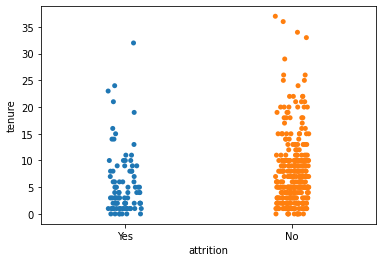

In [45]:
sns.stripplot(y = 'tenure', x = 'attrition', data = sales)

In [56]:
sales.tenure <= 1

0       False
18      False
21      False
27      False
29      False
        ...  
1454    False
1461    False
1462    False
1464    False
1468    False
Name: tenure, Length: 446, dtype: bool

In [54]:
sales.loc[(sales.attrition == 'Yes')]

,age,attrition,frequent_traveler,daily_rate,department,commute_distance,education,education_field,employee_count,employee_number,...,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,tenure,time_in_role,years_since_last_promotion,years_with_current_manager,dept_name_abbr
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,Sales
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,...,80,0,10,4,3,5,3,0,3,Sales
33,39,Yes,Travel_Rarely,895,Sales,5,3,Technical Degree,1,42,...,80,1,19,6,4,1,0,0,0,Sales
36,50,Yes,Travel_Rarely,869,Sales,3,2,Marketing,1,47,...,80,0,3,2,3,3,2,0,2,Sales
89,46,Yes,Travel_Rarely,669,Sales,9,2,Medical,1,118,...,80,0,9,3,3,9,8,4,7,Sales
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,31,Yes,Travel_Frequently,754,Sales,26,4,Marketing,1,1967,...,80,0,10,4,3,10,7,0,8,Sales
1396,53,Yes,Travel_Rarely,1168,Sales,24,4,Life Sciences,1,1968,...,80,0,15,2,2,2,2,2,2,Sales
1438,23,Yes,Travel_Frequently,638,Sales,9,3,Marketing,1,2023,...,80,1,1,3,2,1,0,1,0,Sales
1452,50,Yes,Travel_Frequently,878,Sales,1,4,Life Sciences,1,2044,...,80,2,12,3,3,6,3,0,1,Sales


In [60]:
sales.job_role.value_counts(normalize=True)

Sales Executive         0.730942
Sales Representative    0.186099
Manager                 0.082960
Name: job_role, dtype: float64

In [84]:
pd.crosstab(index = [sales.job_role, sales.attrition], columns = sales.one_or_less, 
            normalize='index')

one_or_less                        False      True
job_role             attrition                    
Manager              No         0.828571  0.171429
                     Yes        1.000000  0.000000
Sales Executive      No         0.933086  0.066914
                     Yes        0.877193  0.122807
Sales Representative No         0.740000  0.260000
                     Yes        0.484848  0.515152

In [85]:
pd.crosstab(index = [sales.job_role, sales.attrition], columns = sales.one_or_less)

one_or_less                     False  True
job_role             attrition             
Manager              No            29     6
                     Yes            2     0
Sales Executive      No           251    18
                     Yes           50     7
Sales Representative No            37    13
                     Yes           16    17

In [87]:
17/33

0.5151515151515151